In [69]:
# standard libs
import os
import sys

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [51]:
path_data_france_age = os.path.join('..', 'data_france', 'all_age.csv')
path_data_france_all = os.path.join('..', 'data_france', 'all.csv')

data_france_age = pd.read_csv(path_data_france_age)
data_france_all = pd.read_csv(path_data_france_all)


Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.


In [52]:
data_france_age_sample = data_france_age.sample(frac=.1)
data_france_all_sample = data_france_all.sample(frac=.1)

## Hyperparameters

In [ ]:
# increases computation time 10x compared to defaults
xgb_params_optimal = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

## Regression Experiments

In [ ]:
predictor_linear = AgePredictor(
    model=LinearRegression(),
    df=data_france_age,
    test_training_split=split_by_region,
    preprocessing_stages=[remove_other_attributes]
)
predictor_linear.evaluate_regression()

In [ ]:
predictor_rf = AgePredictor(
    model=RandomForestRegressor(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_other_attributes]
)
predictor_rf.evaluate_regression()

In [ ]:
predictor_region = AgePredictor(
    model=XGBRegressor(),
    df=data_france_age_sample,
    test_training_split=split_by_region,
    preprocessing_stages=[remove_other_attributes]
)
predictor_region.evaluate_regression()

In [ ]:
predictor_ft_importance = AgePredictor(
    model=XGBRegressor(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, remove_other_attributes, add_noise_feature]
)
predictor_ft_importance.evaluate_regression()
predictor_ft_importance.feature_dependence_plot("total_ft_area_within_buffer_100", "total_ft_area_within_buffer_500")
predictor_ft_importance.feature_dependence_plot("feature_noise", "feature_noise")


MAE: 37.998141306278015 y
RMSE: 56.28287887938413 y
R2: 0.3757292492544314


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


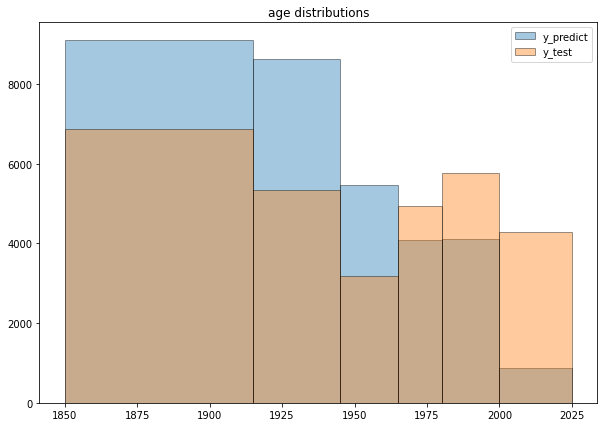

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

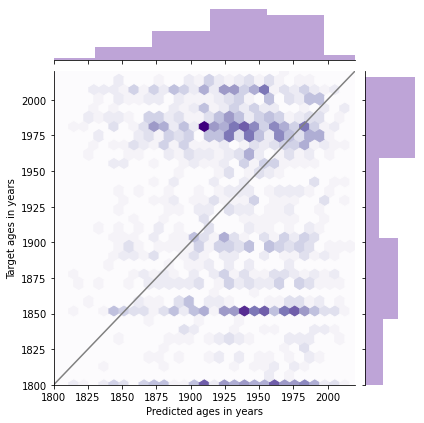

In [29]:
predictor = AgePredictor(
    model=XGBRegressor(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_other_attributes]
)
predictor.evaluate_regression()

In [ ]:
predictor_ft_importance.SHAP_analysis()

In [ ]:
predictor_ft_importance.neighborhood_feature_importance()
predictor_ft_importance.feature_selection()

In [ ]:
# https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html
# https://slundberg.github.io/shap/notebooks/plots/decision_plot.html
# shap.plots.scatter(ex[:,"feature_noise"], color=ex[:,"feature_noise"])
predictor_ft_importance.feature_dependence_plot("total_ft_area_within_buffer_100", "total_ft_area_within_buffer_500", transparency=0.1)

In [ ]:
predictor_all_attributes = AgePredictor(
    model=XGBRegressor(),
    df=data_france_age,
    test_training_split=split_80_20,
    preprocessing_stages=[keep_other_attributes]
)
predictor_all_attributes.evaluate_regression()

## Classification Experiments

              precision    recall  f1-score   support

           0       0.40      0.06      0.10      5802
           1       0.54      0.77      0.63     26511
           2       0.53      0.38      0.44     16877
           3       0.50      0.52      0.51     25331
           4       0.53      0.53      0.53     27861
           5       0.52      0.45      0.48     20434

    accuracy                           0.52    122816
   macro avg       0.50      0.45      0.45    122816
weighted avg       0.52      0.52      0.51    122816



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


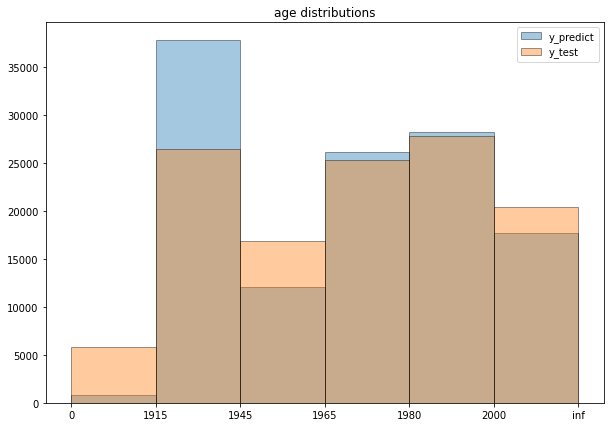

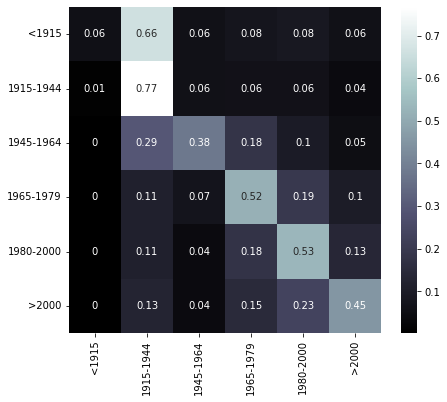

In [62]:
model = XGBClassifier(objective='multi:softmax', num_class=6, use_label_encoder=False, eval_metric=["merror", "mlogloss"])
classifier = AgePredictor(
    model=model,
    df=data_france_age,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, remove_other_attributes, categorize_age_EHS]
)
classifier.evaluate_classification()

In [73]:
visualizations.plot_log_loss(classifier.model)
visualizations.plot_classification_error(classifier.model)

AttributeError: 'XGBClassifier' object has no attribute 'evals_result_'

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


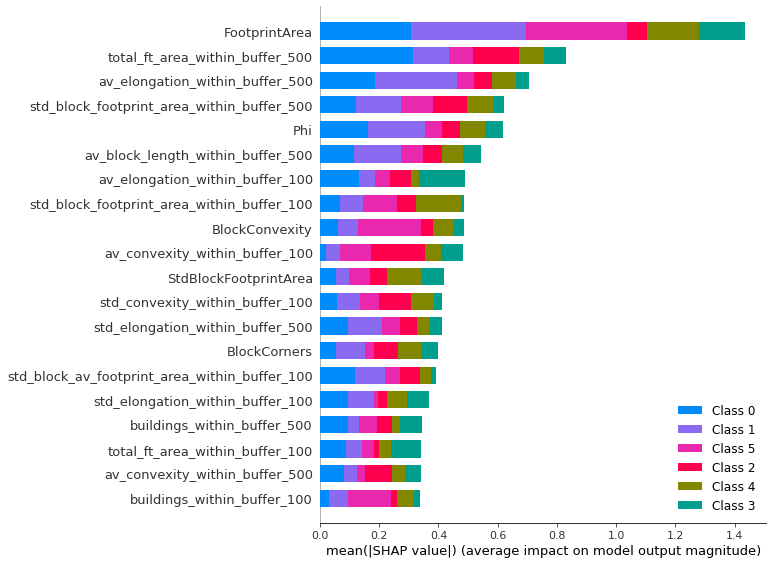

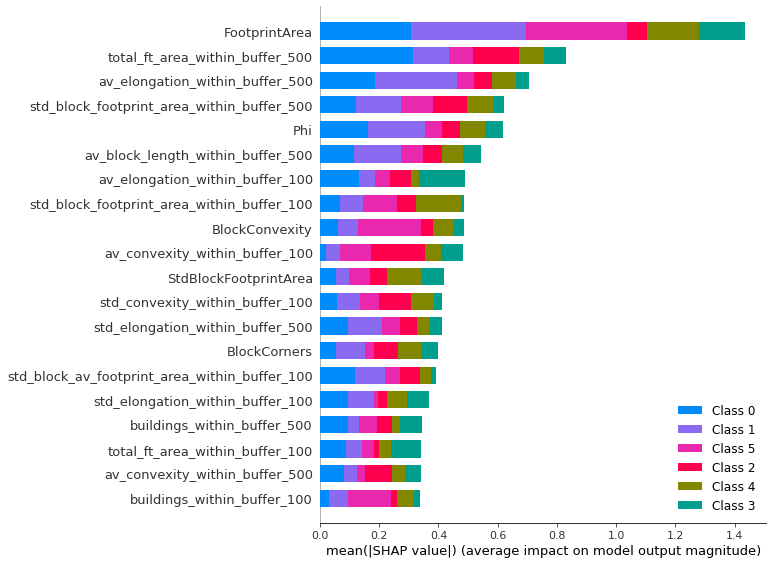

In [74]:
classifier.SHAP_analysis()

In [ ]:
classifier.neighborhood_feature_importance()
classifier.feature_selection()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.20      0.00      0.00       604
           1       0.44      0.69      0.54      2617
           2       0.35      0.16      0.22      1706
           3       0.36      0.47      0.41      2552
           4       0.38      0.38      0.38      2777
           5       0.37      0.23      0.29      2015

    accuracy                           0.39     12271
   macro avg       0.35      0.32      0.31     12271
weighted avg       0.37      0.39      0.36     12271



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


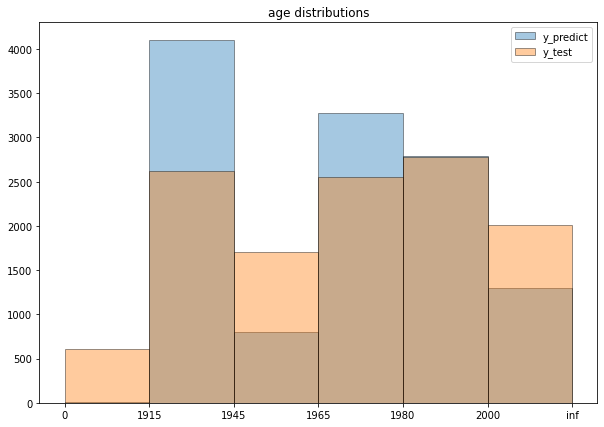

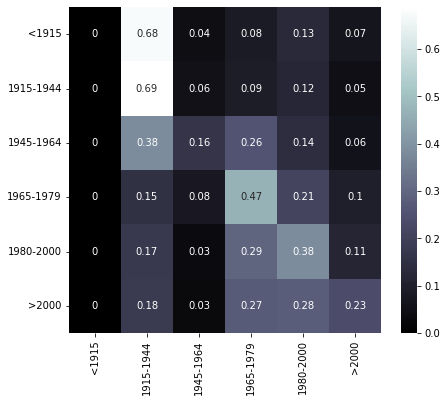

In [71]:
classifier_ada = AgePredictor(
    model=AdaBoostClassifier(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, remove_other_attributes, categorize_age_EHS]
)
classifier_ada.evaluate_classification()

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[15:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.62      0.01      0.02       604
           1       0.46      0.72      0.56      2617
           2       0.41      0.18      0.25      1706
           3       0.40      0.43      0.42      2552
           4       0.40      0.44      0.42      2777
           5       0.41      0.33      0.37      2015

    accuracy                           0.42     12271
   macro avg       0.45      0.35      0.34     12271
weighted avg       0.43      0.42      0.40     12271



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


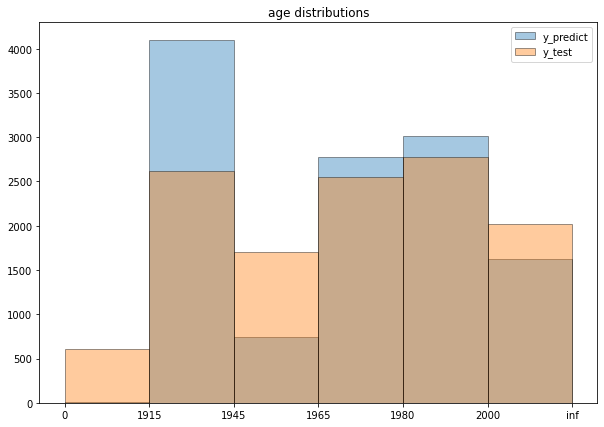

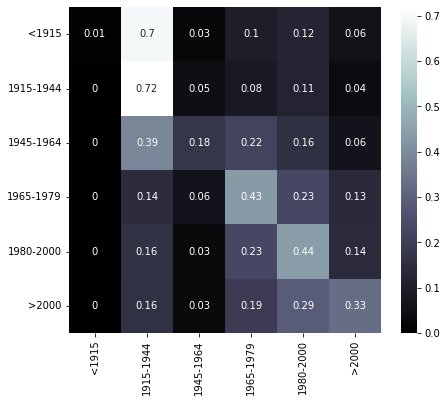

In [72]:
model = XGBRFClassifier(objective='multi:softmax', num_class=6, use_label_encoder=False, eval_metric=["merror", "mlogloss"])
classifier_rf = AgePredictor(
    model=XGBRFClassifier(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers, remove_other_attributes, categorize_age_EHS]
)
classifier_rf.evaluate_classification()

## Hyperparameter Tuning

In [ ]:
predictor = AgePredictor(
    model=XGBRegressor(),
    df=data_france_age_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_other_attributes],
    hyperparameter_tuning=True
)
predictor.evaluate_regression()

In [78]:
grid_search_results = os.path.join('..', 'data_france', 'hyperparameter-tuning-results-21-12.csv')

df_grid_search = pd.read_csv(grid_search_results, sep='\t')
df_grid_search.sort_values(by=['Accuracy'], ascending=False).head(10)

,Unnamed: 0,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,Accuracy
71,71,0.7,0.05,10,1000,1.0,-53.422715
70,70,0.7,0.05,10,1000,0.7,-53.522213
17,17,0.3,0.05,10,1000,1.0,-53.552385
16,16,0.3,0.05,10,1000,0.7,-53.685446
69,69,0.7,0.05,10,500,1.0,-53.737943
89,89,0.7,0.10,10,1000,1.0,-53.793918
15,15,0.3,0.05,10,500,1.0,-53.841906
68,68,0.7,0.05,10,500,0.7,-53.853294
87,87,0.7,0.10,10,500,1.0,-53.885752
35,35,0.3,0.10,10,1000,1.0,-53.908108


In [79]:
regr = LinearRegression()
y = df_grid_search[['Accuracy']]
X = df_grid_search.drop(columns=['Accuracy'])
regr.fit(X, y)
# np.multiply(regr.coef_[0][:-1],[3.5,0.1,500,0.3,0.3])
pd.DataFrame({'feature': df_grid_search.columns[1:],'reg coef': regr.coef_[0]})

,feature,reg coef
0,colsample_bytree,0.080867
1,learning_rate,-10.586768
2,max_depth,-12.772068
3,n_estimators,0.077966
4,subsample,0.001399
5,Accuracy,0.921905
